## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?

Regression is used for predicting continuous numerical values. For example, predicting house prices based on features like square footage and location.
Classification is used for predicting discrete categorical labels. For example, determining whether an email is "spam" or "not spam."
The key difference is that regression outputs a continuous value, while classification assigns inputs to predefined categories.

2. What is a confusion table? What does it help us understand about a model's performance?

A confusion matrix (also called a confusion table) is a table that summarizes a classification model's performance by displaying the number of correct and incorrect predictions across different classes.
It typically includes:
True Positives (TP): Correctly predicted positive cases
False Positives (FP): Incorrectly predicted positive cases (Type I Error)
True Negatives (TN): Correctly predicted negative cases
False Negatives (FN): Incorrectly predicted negative cases (Type II Error)
The confusion matrix helps us calculate key performance metrics like accuracy, precision, recall, and F1-score, allowing us to assess the trade-offs between false positives and false negatives.

3. What does the SSE quantify about a particular model?

SSE (Sum of Squared Errors) measures the total squared difference between predicted and actual values in a regression model.
It quantifies how well the model's predictions align with actual values—the lower the SSE, the better the model fits the data.
However, SSE alone doesn't indicate generalization performance, as a model can have a low SSE on training data but still perform poorly on unseen data (overfitting).

4. What are overfitting and underfitting? 

Overfitting occurs when a model learns the noise and details in the training data rather than the underlying pattern. It has low training error but high test error, meaning it performs well on training data but generalizes poorly to unseen data.
Underfitting occurs when a model is too simple to capture patterns in the data. It has high training and test error, meaning it fails to learn important relationships.
The goal is to find a balance, where the model generalizes well to new data without being too simplistic or overly complex.

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

Data splitting ensures that we train the model on one subset (training set) and evaluate its generalization on another (test set). This prevents data leakage, where the model memorizes patterns in training data but fails to generalize.
Choosing 
𝑘
k (e.g., in k-NN or hyperparameter tuning) by evaluating on the test set helps find an optimal balance between bias and variance, improving the model’s ability to generalize.
Without a test set, we might unknowingly overfit to the training data, leading to poor real-world performance.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Reporting a class label:
Strengths: Simple and interpretable, used in applications where a single decision is required (e.g., spam detection).
Weaknesses: Does not convey uncertainty—if the model is unsure (e.g., 51% confidence in one class vs. 49% in another), we still only get a hard label.
Reporting a probability distribution:
Strengths: Provides more information about confidence levels, allowing for better decision-making in uncertain cases (e.g., medical diagnosis).
Weaknesses: Can be harder to interpret for non-technical users and may require setting a decision threshold for practical use.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

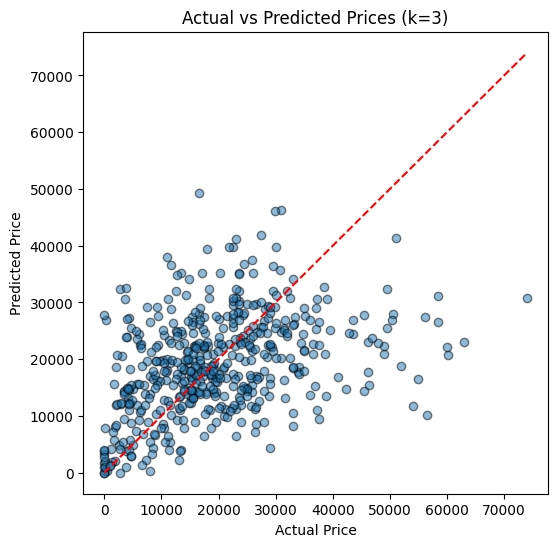

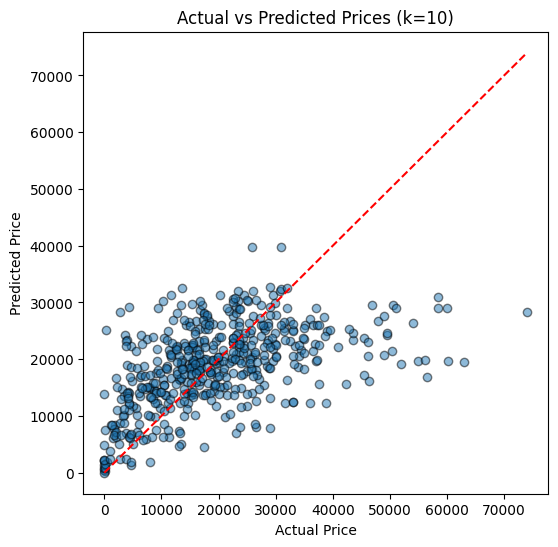

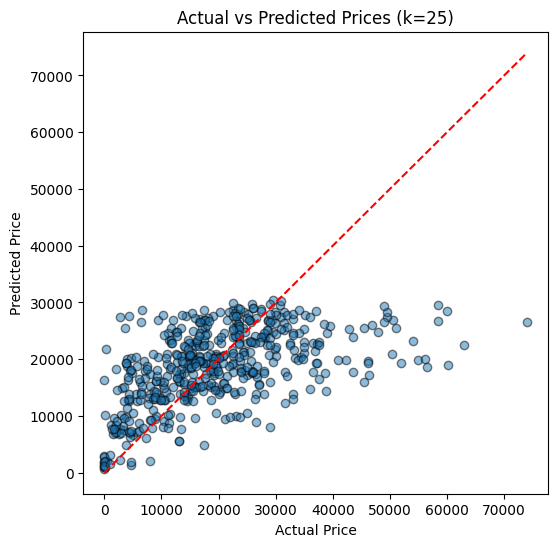

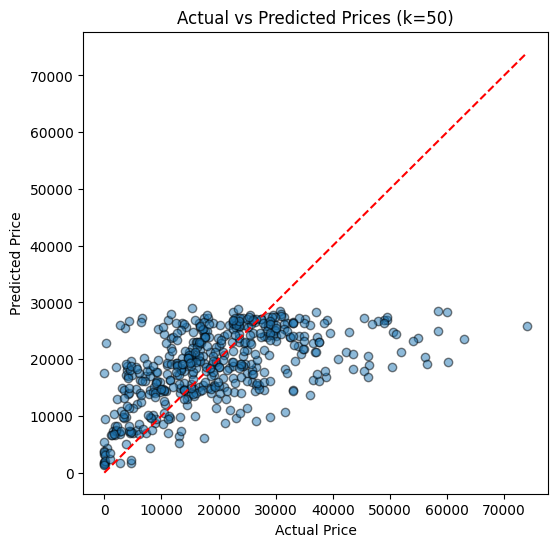

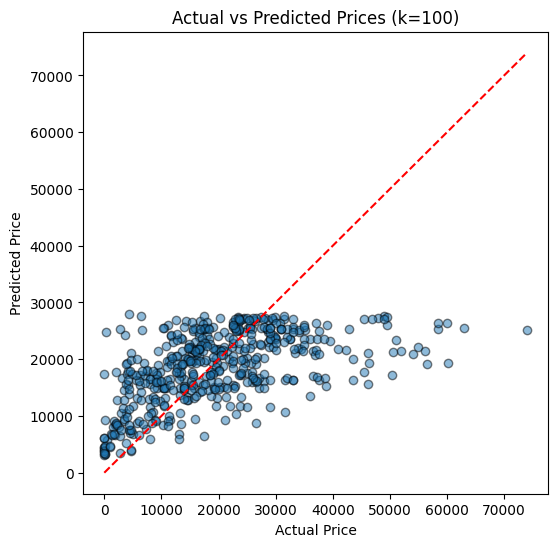

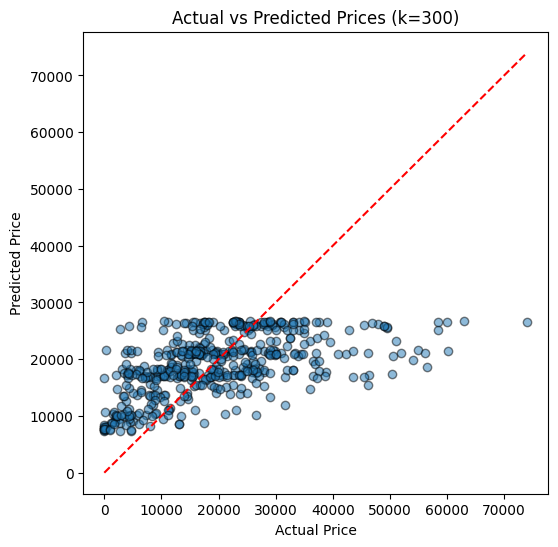

Missing Values:
 price      0
year       0
mileage    0
dtype: int64

Dataset Head:
    price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654

Dataset Shape: (2499, 3)

Mean Squared Errors for k values: {3: 148104157.1862222, 10: 117399126.10604002, 25: 112600455.15990078, 50: 110202287.21426159, 100: 112250845.4893072, 300: 114497778.21548478}

Optimal k: 50


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = "/Users/leyakappukattil/Documents/Spr24-25/DS3001/knn/data/USA_cars_datasets.csv"
df = pd.read_csv(file_path)

# Select relevant columns and drop the rest
df = df[['price', 'year', 'mileage']]

# Check for missing values
na_counts = df.isna().sum()

# Display dataset head and dimensions
data_head = df.head()
data_shape = df.shape

# Min-max normalization of 'year' and 'mileage'
scaler = MinMaxScaler()
df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])

# Split data into training (80%) and testing (20%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Extract features and target variable
X_train, y_train = train_df[['year', 'mileage']], train_df['price']
X_test, y_test = test_df[['year', 'mileage']], test_df['price']

# List of k values to evaluate
k_values = [3, 10, 25, 50, 100, 300]
mse_results = {}

# Perform k-NN regression for different values of k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse
    
    # Scatter plot of actual vs predicted prices
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal fit line
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs Predicted Prices (k={k})")
    plt.show()

# Determine optimal k by finding the minimum MSE
optimal_k = min(mse_results, key=mse_results.get)

# Display results
print("Missing Values:\n", na_counts)
print("\nDataset Head:\n", data_head)
print("\nDataset Shape:", data_shape)
print("\nMean Squared Errors for k values:", mse_results)
print("\nOptimal k:", optimal_k)


### **4. Patterns Observed as \( k \) Increases**
As \( k \) increases, the predictions become more stable and less noisy, but they also become more biased. At **\( k=3 \)**, the predictions are highly variable, meaning the model is very sensitive to individual data points, which can lead to **overfitting**. The scatterplot shows a larger spread of predicted prices, particularly for higher-priced cars.

As \( k \) increases to **\( k=10, 25, 50 \)**, the predictions start smoothing out, and the model generalizes better. The points are more closely aligned with the diagonal red line, indicating improved prediction accuracy. The MSE decreases as \( k \) increases up to **\( k=50 \)**.

For **\( k=100, 300 \)**, the predictions become too smooth, meaning the model is averaging over too many neighbors. This results in **underfitting**, where the model fails to capture important variations in price. The scatterplot shows a tighter, compressed grouping around the center, indicating that extreme values (both high and low prices) are being predicted less accurately.

### **5. Optimal \( k \)**
The optimal \( k \) is determined by the minimum **Mean Squared Error (MSE)**. In this case, **\( k=50 \)** has the lowest MSE, meaning it provides the best balance between bias and variance. Smaller values of \( k \) overfit, while larger values lead to underfitting.

### **6. Relationship Between \( k \) and Underfitting/Overfitting**
- **Overfitting:** Occurs when \( k \) is too small (e.g., \( k=3 \)), making predictions overly sensitive to individual data points. This leads to high variance and poor generalization to unseen data.
- **Underfitting:** Occurs when \( k \) is too large (e.g., \( k=300 \)), making predictions overly smoothed and failing to capture important variations in the data.
- **Balanced Model:** The optimal \( k=50 \) achieves a trade-off, where predictions follow the general trend without being overly affected by individual noise.

The scatterplots visually confirm these patterns, showing greater spread at lower \( k \) and more compression at higher \( k \), illustrating the shift from overfitting to underfitting.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.